# Versuch 3 - Code 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

1. Bestimmung der Tonhöhe eines akustischen Signals 

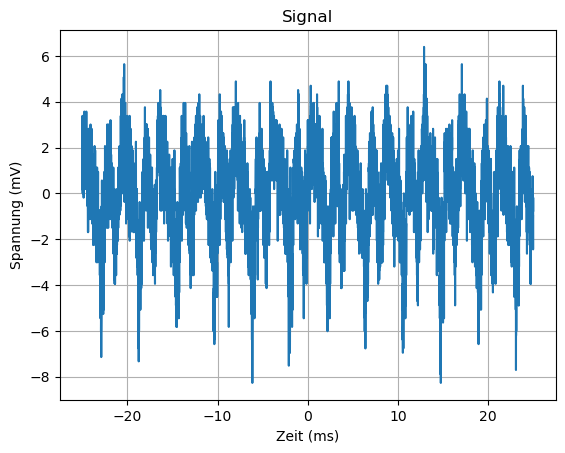

Grundperiode: 0.02209734457522124 ms
Grundfrequenz: 45254.30630797809 Hz
Signaldauer: 0.050014998729999996 s
Abtastfrequenz: 200000.00507847662 Hz
Signallänge: 10004 M
Abtastintervall: 4.999999873038088e-06 s


In [15]:
file_path = "aufgabe1_3.csv"
#csv Datei einlesen
#wichtig: erste Spalte enthält Zeitwerte in ms, zweite Spalte gemessene Spannung in mV 
data = np.genfromtxt(file_path, delimiter=';',skip_header=3, usecols=(0,1), converters={0: lambda s: float(s.decode('utf-8').replace(',', '.')), 1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

zeit_ms = data[:,0]
spannung_mV = data[:,1]

plt.plot(zeit_ms, spannung_mV)
plt.xlabel('Zeit (ms)')
plt.ylabel('Spannung (mV)')
plt.title('Signal')
plt.grid(True)
plt.show()



#Umrechnung der Einheiten für Berechnung (in Sekunden und Volt)
zeit = zeit_ms / 1000
spannung = spannung_mV / 1000 
#Signaldauer (Differenz zwischen letzten und ersten Zeitwert)
signaldauer = zeit[-1] - zeit[0]
#Abtastintervall Mittelwert der Differenzen zwischen aufeinanderfolgenden Zeitwertem
abtastintervall = np.mean(np.diff(zeit))
abtastfrequenz = 1 / abtastintervall
signallaenge  = len(zeit)


#Grundperiode und Grundfrequenz bestimmen 
maxima, _ = find_peaks(spannung, height = 0) #Maxima im Spannug-Array finden 

maxima_abstaende = np.diff(zeit[maxima])
grundperiode = np.mean(maxima_abstaende) * 1000
grundfrequenz =  1 / (grundperiode / 1000)  
  
print(f"Grundperiode: {grundperiode} ms")
print(f"Grundfrequenz: {grundfrequenz} Hz")
print(f"Signaldauer: {signaldauer} s")
print(f"Abtastfrequenz: {abtastfrequenz} Hz")
print(f"Signallänge: {signallaenge} M")
print(f"Abtastintervall: {abtastintervall} s")

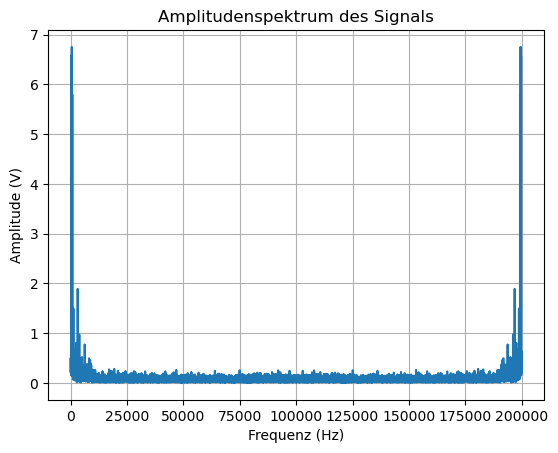

In [25]:
#Fouriertransformierte des Signals berechnen
fourier_transform = np.fft.fft(spannung)
#Amplitudenspektrum berechnen
amplitude = np.abs(fourier_transform)
# Erstellung der Frequenzachse für das Amplitudenspektrum
n = np.arange(signallaenge)
 # Formel f = n/(M·∆t) Frequenzen in Anzahl der Schwingungen pro Signaldauer
frequenzen_hz = n / (signallaenge * abtastintervall)

# Grafische Darstellung des Amplitudenspektrums
plt.plot(frequenzen_hz, amplitude)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Amplitude (V)')
plt.title('Amplitudenspektrum des Signals')
plt.grid(True)
plt.show()

In [29]:
# Index des Maximum mit der höchsten Amplitude finden
maxima_index = np.argmax(amplitude)
# Grundfrequenz (in Hz) und Amplitude der Maxima bestimmen
grundfrequenz_hz = frequenzen_hz[maxima_index]
grundamplitude = amplitude[maxima_index]

print("Grundfrequenz im Amplitudenspektrum:", grundfrequenz_hz, "Hz")
print("Amplitude:", grundamplitude, "V")

Grundfrequenz im Amplitudenspektrum: 199520.19698952383 Hz
Amplitude: 6.751671292474222 V


2. Frequenzgang von Lautsprechern 

In [1]:
amplituden_links = ([1.500, 1.510, 1.484, 1.484, 1.519, 1.519, 1.501, 1.519, 1.501, 1.519, 1.484, 1.519, 1.519, 1.501, 1.519, 1.519, 1.501])
mikrofonsignal_links = ([0.0169, 0.0385, 0.0264, 0.0212, 0.0173, 0.0173, 0.0186, 0.0173, 0.0169, 0.0169, 0.0173, 0.0164, 0.0151, 0.0203, 0.0277, 0.0212, 0.0113]) #amplituden ausgangssignal
phasenverschiebung_links = ([5.0150, 0.0569, 3.1700, 2.2580, 1.7570, 1.2630, 1.0090, 0.8208, 0.6147, 0.4851, 0.3988, 0.3085, 0.1400, 0.0655, 0.1951, 0.1274, 0.0673])

print("Linker Lautsprecher")
print()
print("Amplituden | Mikrofonsignal | Phasenverschiebung ")
print("--------------------------------------------------")

for amp, mic, phase in zip(amplituden_links, mikrofonsignal_links, phasenverschiebung_links):
    print(f"{amp:<10} | {mic:<13} | {phase:<18}")


Linker Lautsprecher

Amplituden | Mikrofonsignal | Phasenverschiebung 
--------------------------------------------------
1.5        | 0.0169        | 5.015             
1.51       | 0.0385        | 0.0569            
1.484      | 0.0264        | 3.17              
1.484      | 0.0212        | 2.258             
1.519      | 0.0173        | 1.757             
1.519      | 0.0173        | 1.263             
1.501      | 0.0186        | 1.009             
1.519      | 0.0173        | 0.8208            
1.501      | 0.0169        | 0.6147            
1.519      | 0.0169        | 0.4851            
1.484      | 0.0173        | 0.3988            
1.519      | 0.0164        | 0.3085            
1.519      | 0.0151        | 0.14              
1.501      | 0.0203        | 0.0655            
1.519      | 0.0277        | 0.1951            
1.519      | 0.0212        | 0.1274            
1.501      | 0.0113        | 0.0673            


In [2]:
amplitude_rechts = [1.501, 1.519, 1.519, 1.501, 1.519, 1.519, 1.501, 1.501, 1.501, 1.519, 1.519, 1.519, 1.501, 1.519, 1.519, 1.519, 1.519]
mikrofonsignal_rechts = [0.0104, 0.0134, 0.0164, 0.0182, 0.0320, 0.0177, 0.0190, 0.0151, 0.0156, 0.0147, 0.0147, 0.0151, 0.0121, 0.0113, 0.0255, 0.0147, 0.0130]
phasenverschiebung_rechts = [5.3650, 1.9340, 1.0510, 0.5944, 0.0997, 1.2360, 1.0130, 0.7829, 0.6239, 0.4708, 0.3765, 0.2941, 0.1148, 0.2459, 0.1752, 0.0972, 0.0830]

print("Rechter Lautsprecher")
print()
print("Amplituden | Mikrofonsignal | Phasenverschiebung ")
print("--------------------------------------------------")

for amp, mic, phase in zip(amplituden_links, mikrofonsignal_links, phasenverschiebung_links):
    print(f"{amp:<10} | {mic:<13} | {phase:<18}")

Rechter Lautsprecher

Amplituden | Mikrofonsignal | Phasenverschiebung 
--------------------------------------------------
1.5        | 0.0169        | 5.015             
1.51       | 0.0385        | 0.0569            
1.484      | 0.0264        | 3.17              
1.484      | 0.0212        | 2.258             
1.519      | 0.0173        | 1.757             
1.519      | 0.0173        | 1.263             
1.501      | 0.0186        | 1.009             
1.519      | 0.0173        | 0.8208            
1.501      | 0.0169        | 0.6147            
1.519      | 0.0169        | 0.4851            
1.484      | 0.0173        | 0.3988            
1.519      | 0.0164        | 0.3085            
1.519      | 0.0151        | 0.14              
1.501      | 0.0203        | 0.0655            
1.519      | 0.0277        | 0.1951            
1.519      | 0.0212        | 0.1274            
1.501      | 0.0113        | 0.0673            


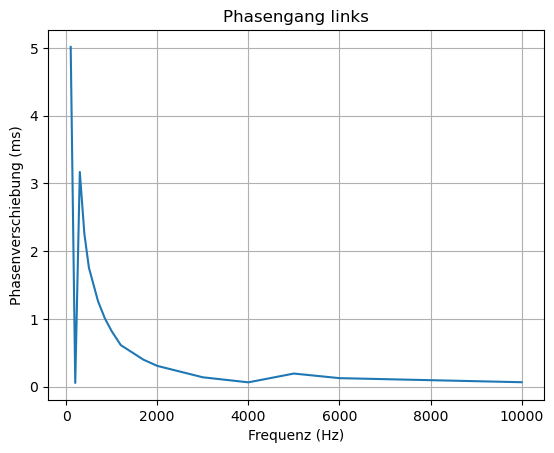

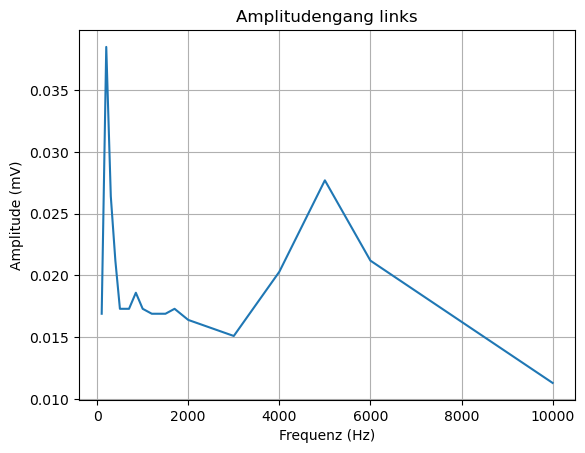

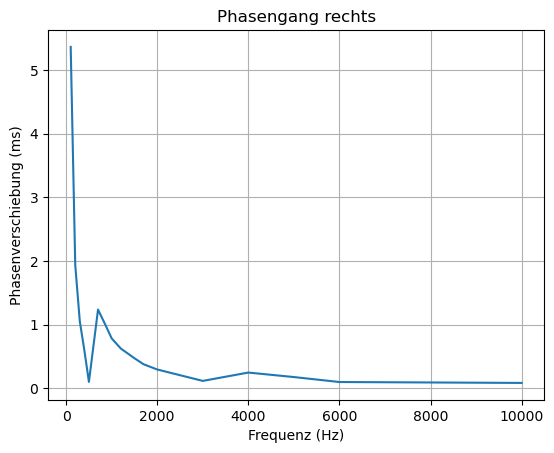

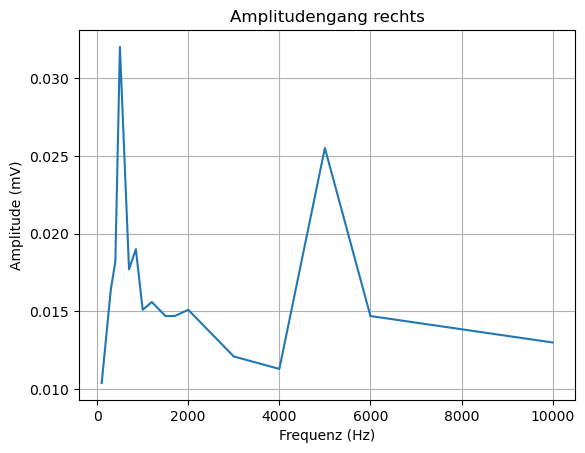

In [5]:

frequenz = [100,200,300,400,500,700,850,1000,1200,1500,1700,2000,3000,4000,5000,6000,10000]
amplitude_eingang_links = [1.500, 1.510, 1.484, 1.484, 1.519, 1.519, 1.501, 1.519, 1.501, 1.519, 1.484, 1.519, 1.519, 1.501, 1.519, 1.519, 1.501]
mikrofonsignal_links = [0.0169, 0.0385, 0.0264, 0.0212, 0.0173, 0.0173, 0.0186, 0.0173, 0.0169, 0.0169, 0.0173, 0.0164, 0.0151, 0.0203, 0.0277, 0.0212, 0.0113] #amplituden ausgangssignal
phasenverschiebung_links = [5.0150, 0.0569, 3.1700, 2.2580, 1.7570, 1.2630, 1.0090, 0.8208, 0.6147, 0.4851, 0.3988, 0.3085, 0.1400, 0.0655, 0.1951, 0.1274, 0.0673]

amplitude_eingang_rechts = [1.501, 1.519, 1.519, 1.501, 1.519, 1.519, 1.501, 1.501, 1.501, 1.519, 1.519, 1.519, 1.501, 1.519, 1.519, 1.519, 1.519]
mikrofonsignal_rechts = [0.0104, 0.0134, 0.0164, 0.0182, 0.0320, 0.0177, 0.0190, 0.0151, 0.0156, 0.0147, 0.0147, 0.0151, 0.0121, 0.0113, 0.0255, 0.0147, 0.0130]
phasenverschiebung_rechts = [5.3650, 1.9340, 1.0510, 0.5944, 0.0997, 1.2360, 1.0130, 0.7829, 0.6239, 0.4708, 0.3765, 0.2941, 0.1148, 0.2459, 0.1752, 0.0972, 0.0830]


fig, p1 = plt.subplots()
p1.plot(frequenz, phasenverschiebung_links)
p1.set_title('Phasengang links')
p1.set_ylabel('Phasenverschiebung (ms)')
p1.set_xlabel('Frequenz (Hz)')
p1.grid(True)
plt.show()

fig, p2 = plt.subplots()
p2.plot(frequenz, mikrofonsignal_links)
p2.set_title('Amplitudengang links')
p2.set_ylabel('Amplitude (mV)')
p2.set_xlabel('Frequenz (Hz)')
p2.grid(True)
plt.show()


fig, p1 = plt.subplots()
p1.plot(frequenz, phasenverschiebung_rechts)
p1.set_title('Phasengang rechts')
p1.set_ylabel('Phasenverschiebung (ms)')
p1.set_xlabel('Frequenz (Hz)')
p1.grid(True)
plt.show()

fig, p2 = plt.subplots()
p2.plot(frequenz, mikrofonsignal_rechts)
p2.set_title('Amplitudengang rechts')
p2.set_ylabel('Amplitude (mV)')
p2.set_xlabel('Frequenz (Hz)')
p2.grid(True)
plt.show()

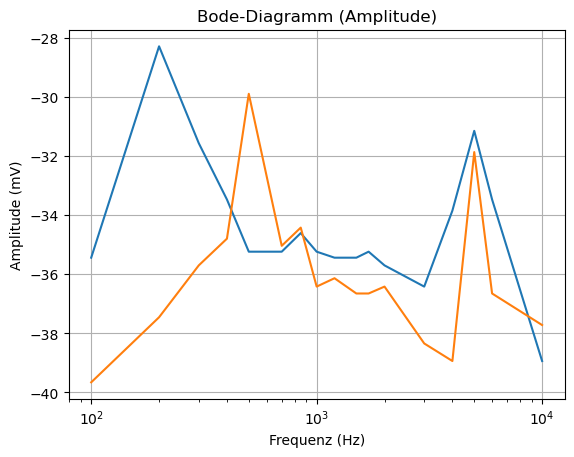

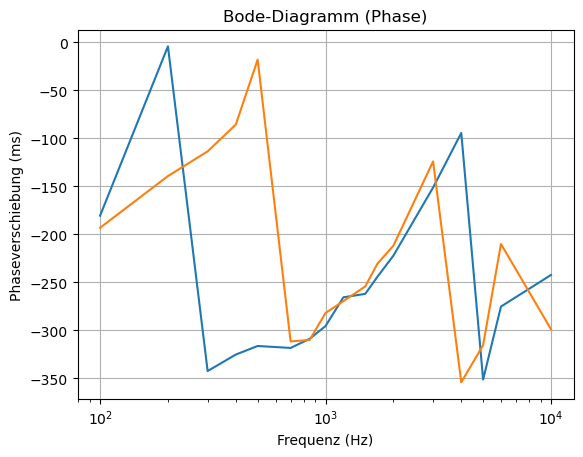

In [6]:
# Amplitude in dB (bei Amplitude Formel von 10 auf 20 anpassen, da sie im Quadrat zur Leistung steht)
amplitude_links = 20 * np.log10(mikrofonsignal_links)
amplitude_rechts = 20 * np.log10(mikrofonsignal_rechts)

#Phase in degree
phase_degree_links = -np.array(phasenverschiebung_links) * np.array(frequenz) * 360/1000 # 1000 um Zeitphasenverschiebung (ms) in Phasenverschiebung (°) umzurechnen
phase_degree_rechts = -np.array(phasenverschiebung_rechts) * np.array(frequenz) * 360/1000

fig, p3 = plt.subplots()
p3.plot(frequenz, amplitude_links)
p3.plot(frequenz, amplitude_rechts)
p3.set_title('Bode-Diagramm (Amplitude)')
p3.set_ylabel('Amplitude (mV)')
p3.set_xlabel('Frequenz (Hz)')
p3.grid(True)
p3.semilogx()
plt.show()

fig, p4 = plt.subplots()
p4.plot(frequenz, phase_degree_links)
p4.plot(frequenz, phase_degree_rechts)
p4.set_title('Bode-Diagramm (Phase)')
p4.set_ylabel('Phaseverschiebung (ms)')
p4.set_xlabel('Frequenz (Hz)')
p4.grid(True)
p4.semilogx()
plt.show()

Infos aus Datenblatt 
- Sensitivität des Mikrofons: -54dB+-3dB
- Frequenzbereich: 70Hz - 13KHz

Bode-Diagramm zeigt Amplituden und Phasenverschiebung eines Systems in Abhängigkeit von der Frequenz.

*Amplitude:*
- Resonanz: 
	- erster Höhepunkt in der Amplitude deutet auf eine Resonanzfrequenz hin, bei der das System besonders stark auf eine bestimmte Eingangsfrequenz reagiert

- Dämpfung: 
	- Nach der Resonanzfrequenz nimmt die Amplitude ab
	- Dämpfungseffekte im System --> Stabilität des Systems

- Filter: 
	- Weiterer Höhepunkt --> Resonanzfrequenz oder Filter, die bestimmte Frequenzbereiche verstärken oder abschwächen

*Phase:*
- mehrere Resonanzfrequenzen im System
- Auftreten von Phasenüberhöhungen, wenn die Phasenverschiebung über 360 Grad steigt


- Resonanzfrequenzen: Frequenzen, bei denen das System eine maximale Antwort zeigt
- Phasenüberhöhungen: Anstieg der Phasenverschiebung über 360 Grad